<h1>do you need to crank 90s in fortnite to win?</h1>   
<h2>an analysis</h2>
<h4>i bought the battle pass during this</h4>
kay shrieve | data in emat | 5/11/21

In [79]:
from bs4 import BeautifulSoup
import lxml
import pandas as pd
import requests
import json
import plotly.express as px
import json
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import time
from scipy import stats

<h1> 1. purpose </h1> 
In this report, I will try to find out if you need to build in the game Fortnite, in order to be good at the game. Building is a main game mechanic when you're playing the battle royale, but it is optional and you don't actually **have** to do it. It's purpose in the game is to get higher ground on your opponent, or to have a wall in between you and them so they cannot hit you. It is very useful, but do you need to do it? 

<h1>1a. overview </h1>
My hypothesis for this report is that you don't have to build during a game of Fortnite to be good at the game. I defining "being good" as getting in the top 10, as that is the lowest you can be in a match to get into the solo leaderboards. "Not buidling" is using less than 100 materials. (10 materials are used for 1 strucutre.)

To show this, I am going to look at the match stats from 88 games of Fortnite that I played over the course of 3 days. Specifically: 

1. Placed (what # out of 100 I was ranked) 
2. Materials Gathered (how many building materials I picked up, wether by breaking them down or from loot chests) 
3. Materials Used (how many building materials I actually placed down to make a structure) 

Above, I loaded in the libraries I am going to use (or thought I was going to use) for this report and below I am about to load in my data, which I obtained manually by recording my personal Fortnite match stats into a spreadsheet, which I then converted into a CSV file. 

<h1>2. Data prep</h1>
    There wasn't a whole lot of data preperation to be done, as my data was taken manually and not pulled from an outside source. I wrote it down in a way that I knew would be easy to work with and that would be good for this purpose. I did have to mess with it a little bit though, as you will see below:

In [80]:
data = pd.read_csv("/Users/kaylashrieve/Desktop/fortnitecsv.csv")
data.head()

,Time of Day,Placed,Eliminations,Assists,Revives,Accuracy,Hits,Head Shots,Distance Traveled,Materials Gathered,Materials Used,Damage Taken,Damage to Players,Damage to Structures
0,6:00 PM,27,2,0,0,23%,14,2,271.08,20,20,272,331,621
1,6:00 PM,45,1,2,0,30%,19,1,396.73,123,30,247,444,998
2,6:00 PM,38,3,0,0,30%,32,1,607.80,71,60,176,322,1109
3,7:00 PM,30,1,3,0,18%,19,1,714.16,244,10,238,330,4726
4,7:00 PM,16,3,1,1,58%,42,18,1140.00,584,150,365,668,2070


A data frame of the full match stats of every game, including data that will not be used in this analysis. 

In [81]:
df = pd.read_csv("/Users/kaylashrieve/Desktop/fortnitecsv.csv", usecols = ['Placed','Materials Gathered','Materials Used'], low_memory = True)

In [82]:
print(df)

    Placed  Materials Gathered  Materials Used
0       27                  20              20
1       45                 123              30
2       38                  71              60
3       30                 244              10
4       16                 584             150
..     ...                 ...             ...
82       2                1750             400
83      24                  94               0
84      30                  78              30
85      18                 370              60
86      39                  75               0

[87 rows x 3 columns]


I took out the collumns in the CSV that I did not need, as I only needed "placed", "Materials Gathered", and "Materials Used", and made this data frame. 

In [83]:
placedsum = data["Placed"].describe()

In [84]:
print(placedsum)

count    87.000000
mean     22.045977
std      13.145791
min       1.000000
25%      15.000000
50%      21.000000
75%      28.500000
max      66.000000
Name: Placed, dtype: float64


Above is a summary of my rank in all my games.  

From here on, I could not get the attribute with the dropped collumns to work, so I manually made a new CSV with only the three collumns, which I used from here on. 

<h1>3. Visualizations</h1>
It took a long time and a lot of trial and error to find a visaluzation that worked well to show if you have to build or not. You can se my different graphs below:  

In [108]:
from matplotlib import style
from numpy import genfromtxt
import plotly.graph_objects as go


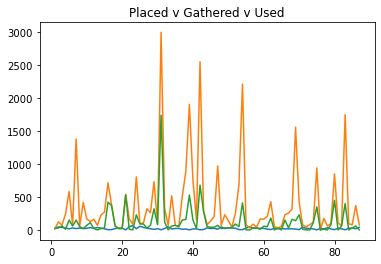

In [96]:
data = genfromtxt('/Users/kaylashrieve/Desktop/fortnitecsv2.csv',delimiter=',')

plt.plot(data)

plt.title('Placed v Gathered v Used')

plt.show()

I tried to make a compound line graph to show the data, but it was hard to read and did not really make much sense to show a correlation of the data. So then, I tried three different histograms of the three different values. 

In [123]:
df = pd.read_csv('/Users/kaylashrieve/Desktop/fortnitecsv2.csv')
fig = px.histogram(df, x="Placed")
fig.show()

The rank histogram ^ 

In [124]:
df = pd.read_csv('/Users/kaylashrieve/Desktop/fortnitecsv2.csv')
fig = px.histogram(df, x="Materials Gathered")
fig.show()

The Materials Gathered histogram ^ 

In [130]:
df = pd.read_csv('/Users/kaylashrieve/Desktop/fortnitecsv2.csv')
fig = px.histogram(df, x="Materials Used")
fig.show()

The Materials Used histogram ^ 

The histograms, when next to each other, **could** give an okay idea on wether or not building has any correlation on your rank in a match, but there is definetly a better option, So I tried a scatter plot next. 

The scatter plot below does a much better job of showing correlation between building an rank. Here, you can start to see that in winning / matches where you get a "good" rank, you don't build much. The plot in the top right is where you can really see it, with most of the ticks being in the bottom corner. 

However, there is an outlier of one second place rank with 1740 materials used. 

In [135]:
df = pd.read_csv('/Users/kaylashrieve/Desktop/fortnitecsv2.csv')
fig = px.scatter_matrix(df,
    dimensions=["Materials Gathered", "Materials Used"],
    color="Placed")
fig.show()

I did try one more histogram, putting all the data together onto one. You can see the correlation a lot better on this one than the separate ones, but I still think the scatter plots show it the best. On this graph, you can see that the >10 wins and <100 materials used far outlie anything else, still, but it doesn't show it as well as the scatter plot. 

In [136]:
df = pd.read_csv('/Users/kaylashrieve/Desktop/fortnitecsv2.csv')
fig = px.histogram(df, x="Materials Used", y="Materials Gathered", color="Placed",
                   marginal="box",
                   hover_data=df.columns)
fig.show()

<h1> 4. Conclusion, and next steps.</h1> 
With the data I have obtained from the match stats by playing 88 consective games of fortnite, I have concluded that you don't neccessarily have to build if you want to rank well in the game. However, there were definetly some outliers where I did build a lot during a match and ranked high as well. 

If I were to do this again, I would take more data, by playing more games, or get data from people other than myself. I think there was definetly a bias in my data because I had played fortnite before this and had prior skill to the game. 